In [7]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set_style('whitegrid')

In [17]:
# Import dataset
df = pd.read_csv("C:/Users/user/Desktop/insurance.csv")
print('Number of rows and columns in the data set: ',df.shape)
df.head()

Number of rows and columns in the data set:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


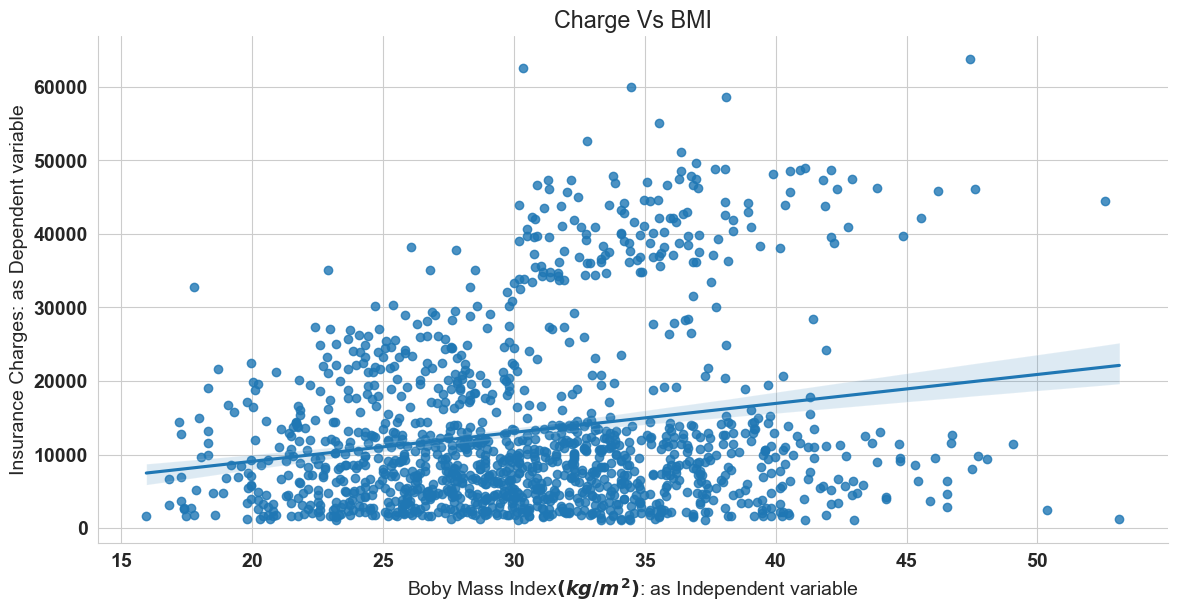

In [19]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')

#bmi 변수 하나만으론 의료비를 예측하기 어려움을 시각적으로 나타냄 

In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


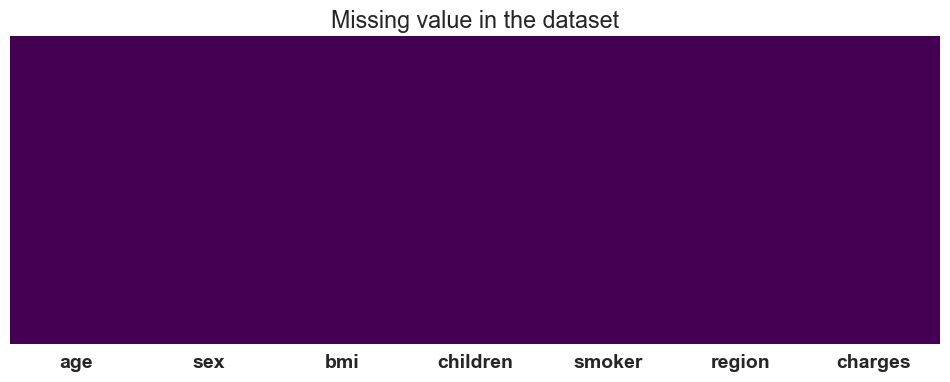

In [23]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')
#결측치 시각화(결측치는 노란색으로 표시됨)


<Axes: >

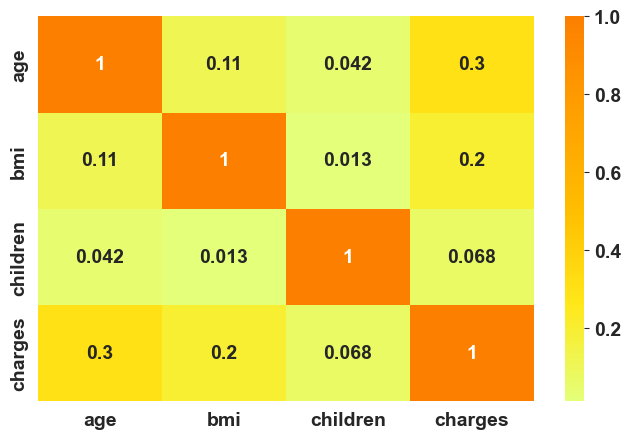

In [27]:
#상관계수 plot
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)
#각 변수간 상관관계가 낮음을 확인함(다중공산성은 낮을것)

C:\Users\user\AppData\Local\Temp\ipykernel_2836\3557087059.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\user\AppData\Local\Temp\ipykernel_2836\3557087059.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40,col

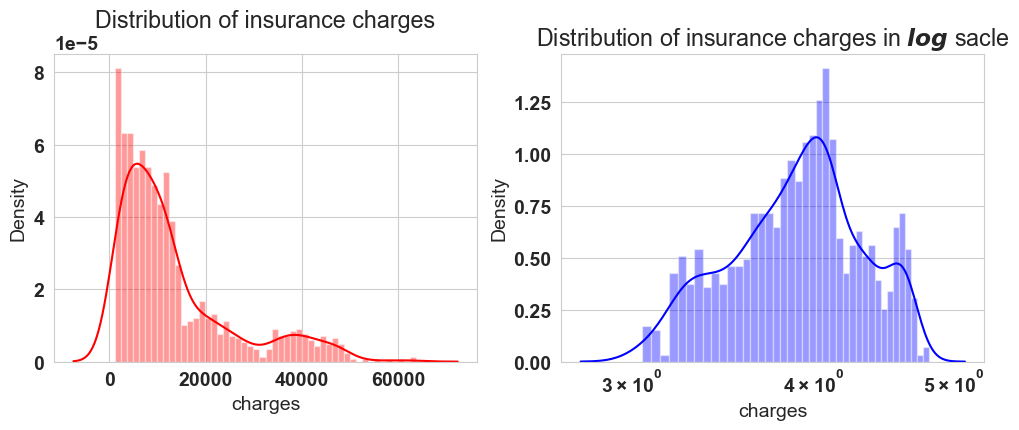

In [31]:
# 종속변수인 charges 분포 확인(log 치환을 통해 정규분포에 가깝게 만들어봄)
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

#오른쪽으로 꼬리가 길어진 분포는 로그를 취할 시 큰 수로 갈수록 값들 사이의 간격을 훨씬 더 강력하게 압축해 정규분포의 모양을 취하게됨 

C:\Users\user\AppData\Local\Temp\ipykernel_2836\4271376697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex',y='charges',data=df,palette='Wistia',ax=ax)
C:\Users\user\AppData\Local\Temp\ipykernel_2836\4271376697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker',y='charges',data=df,palette='magma',ax=ax)


Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

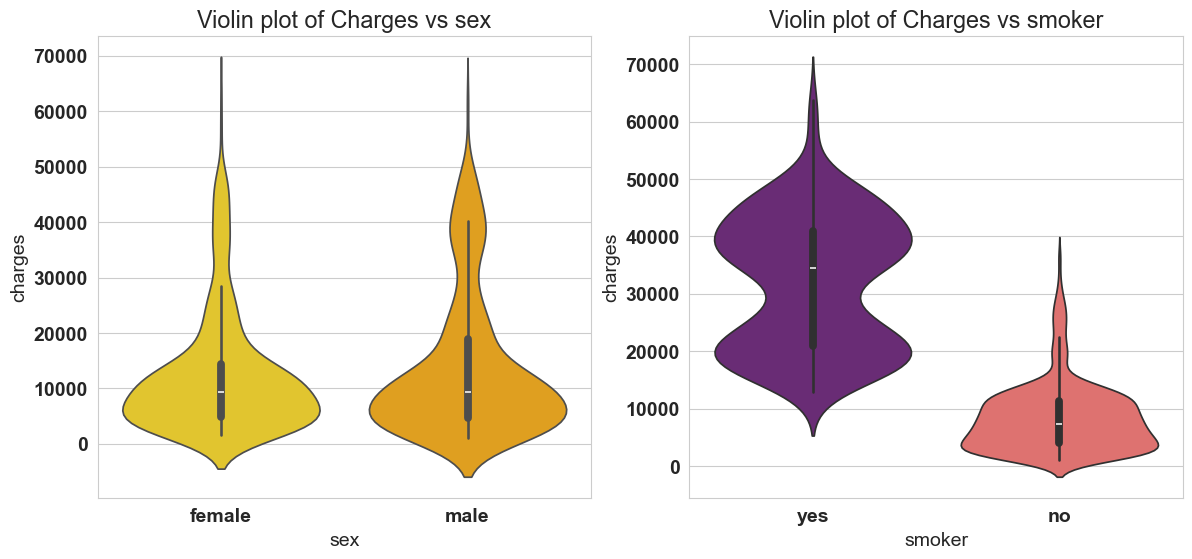

In [33]:
f=plt.figure(figsize=(14,6))
ax=f.add_subplot(121)
sns.violinplot(x='sex',y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax=f.add_subplot(122)
sns.violinplot(x='smoker',y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

#성별간 보험료, 흡연유무의 보험료를 violinplot을 통해 분석
# 성발간 차이는 남성이 여성보다 고액을 더 내지만 그 차이가 뚜렷하다고 말하기는 어렵고, 흡연 유무에 따른 보험료에는 차이가 존재했다

Text(0.5, 1.0, 'Box plot of charges vs children')

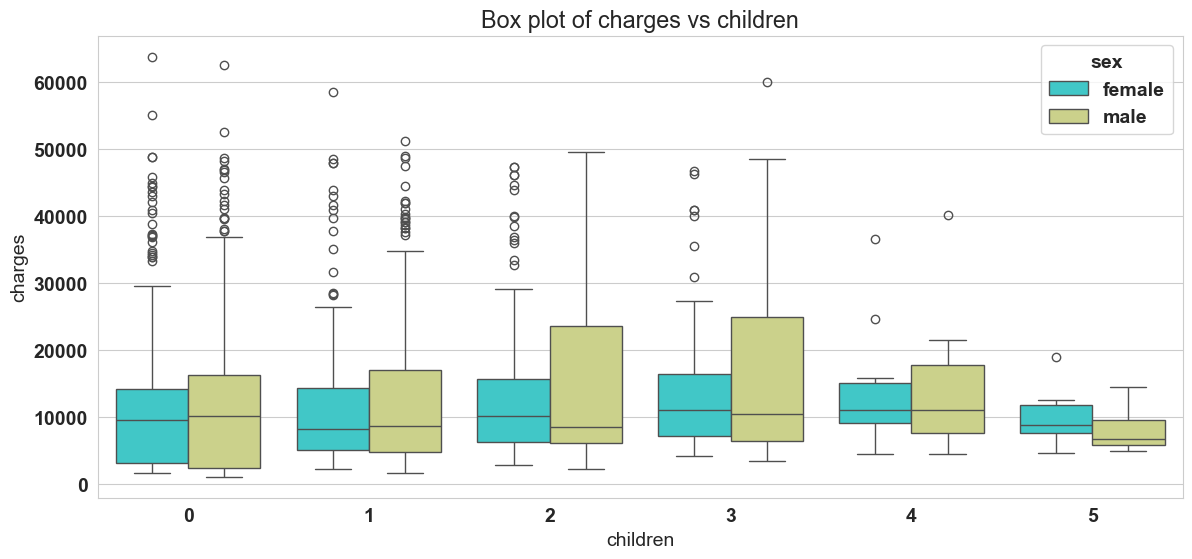

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')
#자녀 수와 성별이 의료비 지출에 영향을 미치는지 확인
#자녀의 수는 의료비 지출에 별로 영향을 주지 못하는 것으로 보임

In [39]:
df.groupby('children')['charges'].agg(['mean', 'min', 'max'])

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of charges vs region')

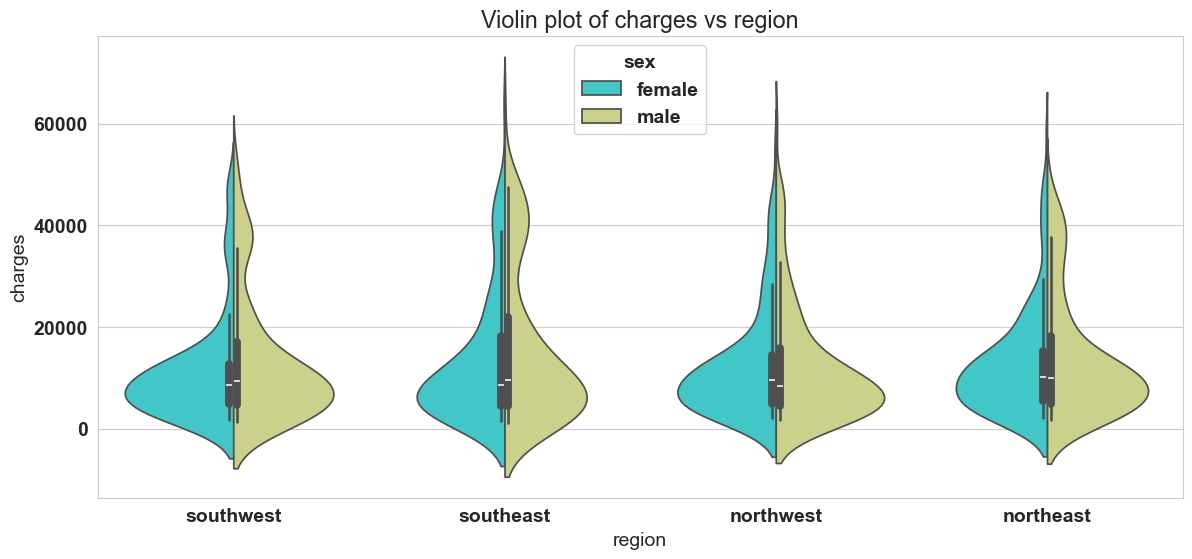

In [43]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region',y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs region')
#지역도 보험료에 영향을 어느정도 주는것으로 보이긴하지만 크다고는 하기 어렵다

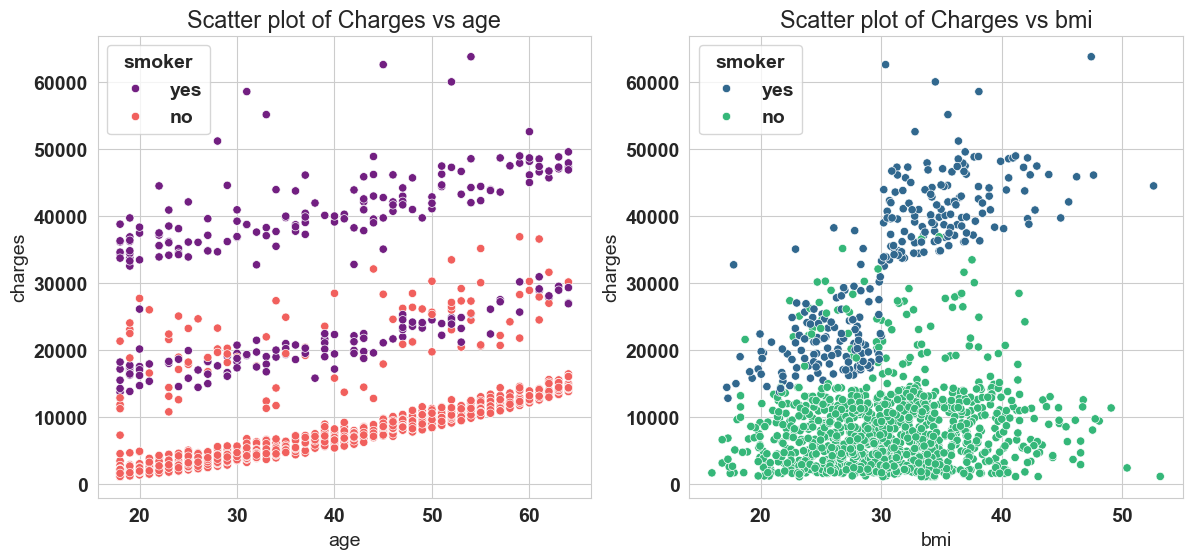

In [45]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

# 왼쪽 그래프: age와 charges의 관계를 흡연 여부에 따라 색상을 구분
# 오른쪽 그래프: bmi와 charges의 관계를 흡연 여부에 따라 색상을 구분

#확실히 흡연여부는 charges에 영향을 주는것으로 보임. 

In [47]:
categorical_columns=['sex','children','smoker','region']
df_encode=pd.get_dummies(data=df,prefix='ONE',prefix_sep='_',
                         columns=categorical_columns,
                         drop_first=True,
                         dtype='int8')

In [49]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
#원핫인코딩 하고 안하고 차이 보기 

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'ONE_male' 'ONE_1' 'ONE_2' 'ONE_3' 'ONE_4' 'ONE_5'
 'ONE_yes' 'ONE_northwest' 'ONE_southeast' 'ONE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [53]:
from scipy.stats import boxcox
y_bc,lam,ci=boxcox(df_encode['charges'],alpha=0.05)
ci,lam
#로그변환과 같이 정규분포가 아닌 종속변수를 정규분포에 가까운 모양으로 변환하는데 사용
#만약 최적의 람다가 0이면 로그변환과 같음
#최적의 람다가 0.5라면 제곱근 변환과 유사함
#최적의 람다가 2라면 제곱변환과 유사함 
#box cox 변환은 알아서 가장 정규분포에 가깝게 만들어주는 람다값을 자동으로 찾아주는 도구

#결과를 보면 람다가 0에 가깝게 나오고, 95% 신뢰구간 안에 0이 포함되므로 최적의 람다를 0으로 쓰는것과 0.0436..을 쓰는것과 유의미한 차이가 없다
# = 로그변환 사용해도 된다 

((-0.011402906172966682, 0.09880968597671798), 0.043649061187374535)

In [55]:
df_encode['charges']=np.log(df_encode['charges'])

In [63]:
#범주형 변수를 숫자로 변환(인코딩), 원본 열을 제거(get_dummies 사용하면 알아서 원본 열을 자동 삭제), drop_first로 첫번째 열을 삭제해 다중공산성 방지 

In [61]:
from sklearn.model_selection import train_test_split
X=df_encode.drop('charges',axis=1)
y=df_encode['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [69]:
X_train_0=np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0=np.c_[np.ones((X_test.shape[0],1)),X_test]
theta=np.matmul(np.linalg.inv(np.matmul(X_train_0.T,X_train_0)),np.matmul(X_train_0.T,y_train))

#numpy로 정규방정식 이론을 직접 구현해봄 

In [71]:
parameter=['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns=['intersect:x_0=1']+list(X.columns.values)
parameter_df=pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
#생성한 각 계수(theta)를 dataframe형식으로 만들기 

In [75]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df
#직접 정규방정식으로 구한 theta와 scikit learn으로 구한 theta 비교하기 위해 하나의 표로 합침 
#정확하게 일치하는걸 확인함 

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,ONE_male,-0.067767,-0.067767
4,theta_4,ONE_1,0.149457,0.149457
5,theta_5,ONE_2,0.272919,0.272919
6,theta_6,ONE_3,0.244095,0.244095
7,theta_7,ONE_4,0.523339,0.523339
8,theta_8,ONE_5,0.466030,0.466030
9,theta_9,ONE_yes,1.550481,1.550481


In [77]:
y_pred_norm =  np.matmul(X_test_0,theta)

J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

#평가지표 손으로 구해보기 
#첫번째 지표는 MSE, 오차의 제곱합의 평균으로 모델의 예측값이 실제 정답과 평균적으로 얼마나 차이 나는지 확인
#두번째 지표는 결정계수, 모델이 y의 전체 변동성중 몇퍼센트를 설명하고 있는가를 의미
# 결정계수의 식은 SSR/SST 혹은 1-SSE/SST인데 의미는 같다

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298182
R square obtain for normal equation method is : 0.7795687545055328


In [79]:
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981895
R square obtain for scikit learn library is : 0.7795687545055319


In [81]:
#결정계수의 값이 약 78퍼센트로 데이터의 총 변동성중 78퍼센트를 설명하고 있다.
#하지만 모델이 예측한 y값은 log를 취한 형태이이므로 역변환 np.exp()로 취해주어야 실제 우리가 구하고싶은 예측 보험료를 알 수 있다.

In [85]:
#선형성,잔차의정규성,변수의 정규성,등분산성을 만족해야하고, 다중공산성에 유의해야한다 

C:\Users\user\AppData\Local\Temp\ipykernel_2836\2788935180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


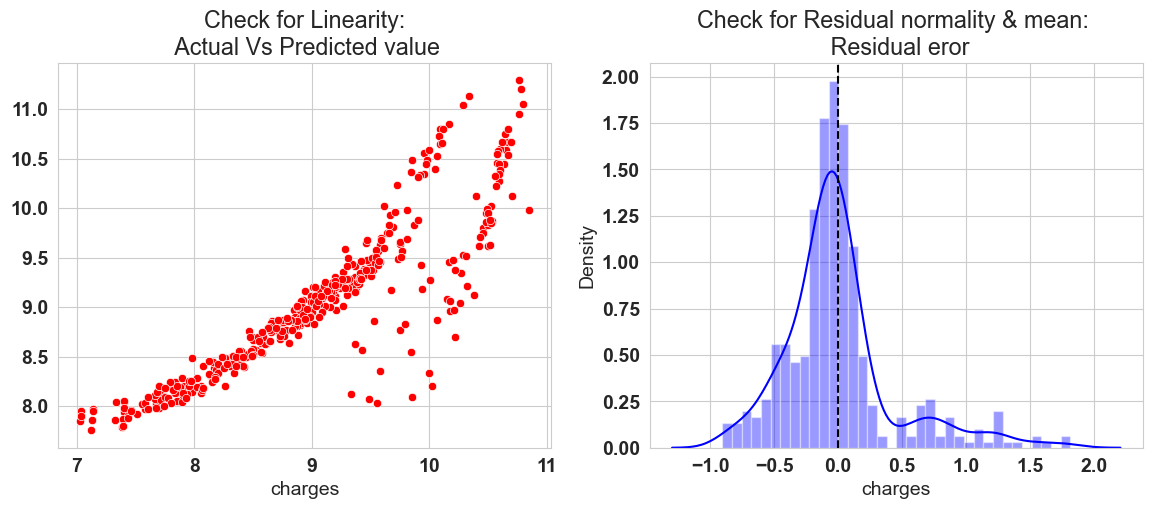

In [87]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
#x축이 실제값, y 축이 예측값인 산점도이다. 45도 대각선 주위에 고루 분포해야 실제값과 예측값이 일치한다는 의미(선형성)

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');
#잔차의 분포도를 나타냄 정규성, 평균 등을 확인해 선형회귀 기존 가정을 만족하는지 확인


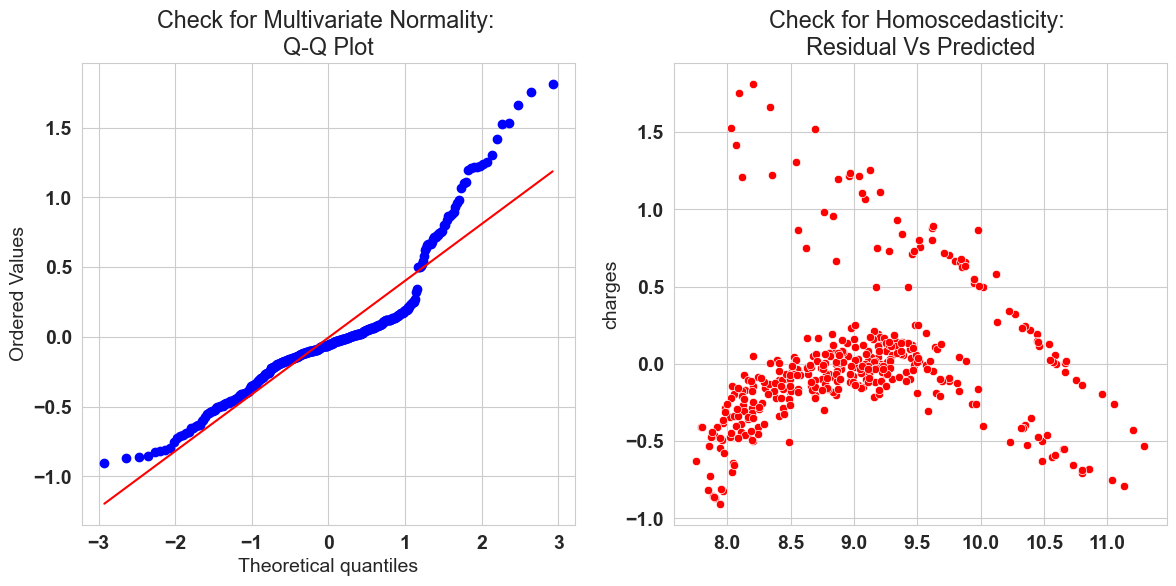

In [89]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')
#잔차가 정규성을 따르는지 qqplot으로 확인
#선에서 벗어나는 구간이 존재(잔차 정규성 위배)

sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');
#등분산성을 만족하는지 확인
#무작위로 배치되어있어야 좋은 모델인데 어느정도 규칙성을 보임(등분산성 위배)

In [91]:
#vif는 공분산성 확인하는 지표
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138